# Shakespeare's World

#womenwriters hashtag: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/229/20878?comment=43161


### Some results


**Userbase:**

* Top 5 users make up 50% of the comments.
* Top 20 users make up 80% of the comments. 

**Types of forum posts:**

The two most popular subforums are:

1. General comment threads about individual subjects - 77.68%
2. A place to ask for help and report bugs - 8.09%

In total, 85.12% of the posts are about as text. 


**Most commoon outgoing links:**

* www.zooniverse.org, 205
* en.wikipedia.org, 77
* books.google.com, 32
* books.google.co.uk, 31
* panoptes-uploads.zooniverse.org, 19
* www.shakespearesworld.org, 12

---

### Technical details: talkanalyzer methods

To make the notebook a bit cleaner, some functions are imported from the ``talkanalyzer`` module (import as ``ta``). This module could then be re-used for any other Talk page if the format is the same. Note that the module takes a Pandas dataframe as input for the data, so this needs to be installed too. 

**1. Class URLconstructor**

To make URLs from the various data points, some functions are provided: 

```Python
    print(ta.URLconstructor.commenturl(700, df)) # Make URL to a comment
    print(ta.URLconstructor.threadturl(40565, df)) # Make URL to thread
    print(ta.URLconstructor.userurl("Hannebambel", df)) # Make URL to user
```


**2. Class Printer**

For easier printing of information that you need from the data, some printing functions are provided. To print HTML, add the optional flag `html=True` (Boolean set to ``False`` by default):

```Python
    ta.Printer.regexpsearch("pippin.*", df) # Search/print regular expression
    ta.Printer.usercomments("Hannebambel", df, html=True) # Print html comments from specific user
    ta.Printer.thread(20690, df) # Print a thread. 
```

**3. Class TimeSeries**

Returns a time series plot for easy tracking of words and users. By setting the optional flag `plot=False` it instead returns a time series as a dictionary. 

```Python
    ta.TimeSeries.regexpsearch('women.*', df) # Returns plot for expression "women" / day.
    ta.TimeSeries.usersearch('Cuboctahedron', df, plot=False)# Returns time series as dictionary for user. 
```

**4. Class Network**
Returns a network visualization of various entry-points to the data. The networks are outdegree networks and put either a search term, a user or a hashtag as focal point. 


````Python
    ta.Network.hashtaghashtagnetwork(searchstring, df, plot=True, html=False)
    ta.Network.hashtagusernetwork(searchstring, df, plot=True, html=False)
    ta.Network.regexpusernetwork(searchstring, df, plot=True, html=False)
    ta.Network.userhashtagnetwork(searchstring, df, plot=True, html=False)
    ta.Network.userusernetwork(searchstring, df, plot=True, html=False)
````

In [9]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import talkanalyzer as ta # Requires pandas
import warnings 
warnings.filterwarnings('ignore') # Remove for debugging
#help(ta)

In [10]:
df = pd.read_json(".data/project-376-comments_2017-04-28.json")
#df.tail()

In [ ]:
#df.comment_user_login.value_counts()
df.comment_user_login.count()

In [ ]:
# Test modules and functions
#ta.Printer.regexpsearch("sick.*", df, html=False) # I need to pass the dataframe to the module class
#ta.Printer.usercomments("Hannebambel", df, html=True)
#ta.Printer.thread(20690, df)
#print(ta.URLconstructor.commenturl(700, df))
#print(ta.URLconstructor.threadturl(10065, df))
#print(ta.URLconstructor.userurl("Hannebambel", df))
#ta.TimeSeries.regexpsearch('sick.*', df)
#ta.TimeSeries.usersearch('mutabilitie', df)

#ta.Network.userusernetwork("mutabilitie", df)
ta.Network.userhashtagnetwork("joolslee", df)

## Most frequent users

Result: 
* Top 5 users make up 50% of the comments.
* Top 20 users make up 80% of the comments. 

In [ ]:
mostfrequentusers = df.comment_user_login.value_counts()[0:10] # Increase this. 
cumulative = 0
counter = 0
for key, value in mostfrequentusers.items():
    counter += 1
    print(str(counter) + ". " + key, 
          str(round(value / len(df) * 100, 2)) + "%")
    cumulative += round(value / len(df) * 100, 2)
    print("\t\t\t\t\tCumulative first " + 
          str(counter) + " users: " + str(cumulative) + "%")

---
## Track a specific user
To track individual users you can use two methods.
1. Print out the users comments.
2. View the user activity over time.

In [ ]:
# Print user comments
ta.Printer.usercomments('username', df)

In [ ]:
# Plot user activity (comments per day.)
ta.TimeSeries.usersearch('username', df, plot=True)

---
## Search using regular expressions
- Add ``.*`` before or after to get remaining text on each line. 

Regular expression to find most top level domains:
    
    'http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/'

In [ ]:
ta.Printer.regexpsearch('beer', df, html=False, context=True)

In [ ]:
ta.TimeSeries.regexpsearch('catholi', df)

In [ ]:
# Most common URLs linked. Note: fix regular expression to be more accurate. 
listofURLS = []
for row in df.iterrows():
    topURL = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', row[1][3])
    if topURL:
        for t in topURL:
            listofURLS.append(t)
            
from collections import Counter

for key in Counter(listofURLS).most_common(20):
    print(key)

## Thread Analysis

1. Longest threads
2. Print each thread by id number

In [ ]:
# Longest threads
df.discussion_id.value_counts()[0:15]

In [ ]:
# A particular forum thread
ta.Printer.thread(57041, df)

In [ ]:
# Calculate how many percent of comments are "subject related (related to texts)
print(str(round(df.comment_focus_type.count() / df.comment_body.count(), 4) * 100) + "%")

In [ ]:
# Sum of posts in each subforum.
for key, value in df.board_description.value_counts().items():
    print(key, value)
    print(str(round(value/len(df), 4) * 100) + "%\n")

## Entire dataset: time series

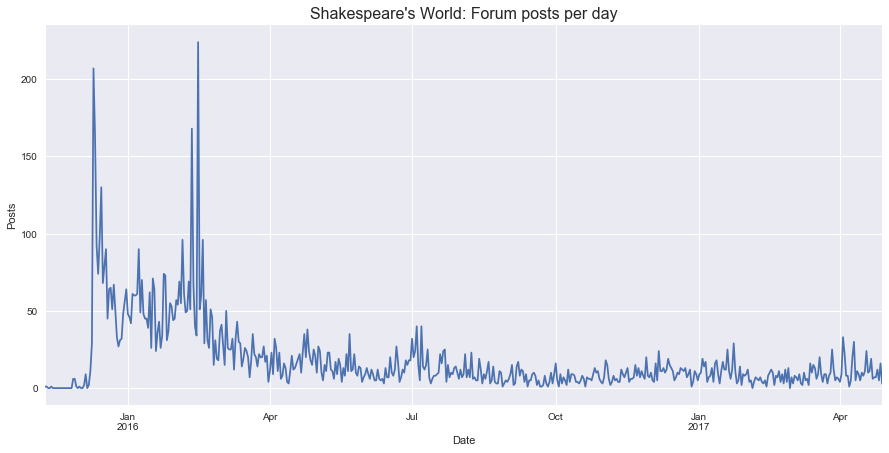

In [4]:
def postsTimeSeries():
    '''Create a time series based on posts per day
    using the dfT dataframe (index by datetime)'''
    dfT = df
    pd.created_at = pd.to_datetime(dfT.comment_created_at, format='%H:%M') # Lite fulparsning av tidsstämpel här.
    dfT.index = pd.created_at
  
    postsperday = dfT.resample('1440T', base=60).count() #1440 min./day

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)

    plt.title('Shakespeare\'s World: Forum posts per day', size=16)

    postsperday['comment_body'].plot() #Plot each individual tweet per minute
    
    plt.xlabel('Date')
    plt.ylabel('Posts')

postsTimeSeries()

In [ ]:
def postsDailyAverage():
    '''Create a time series based on posts per day
    using the dfT dataframe (index by datetime)'''
    dfT = df
    pd.created_at = pd.to_datetime(dfT.comment_created_at, format='%H:%M') # Lite fulparsning av tidsstämpel här.
    dfT.index = pd.created_at
  
    postsperday = df
    
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)

    plt.title('Shakespeare\'s World: Forum posts per hour', size=16)

    plt.plot(postsperday.index.time, 'ro')
    
    #plt.xlabel('Time')
    #plt.ylabel('Posts')

postsDailyAverage()

## Network analysis

### Complete dataset: User thread-network
Create gexf network file. Note. This is very bloated and it is better to create small networks with the functions below. 

In [ ]:
#from gexf import * # https://github.com/paulgirard/pygexf
def createThreadUserNet(dataframe):
    # Intialize network file
    gexf = Gexf("Shakespeares World", "Thread User Network")
    graph = gexf.addGraph("directed", "static", "Thread User directed network")

    # Create nodes
    for user in df.comment_user_login.iteritems():
        graph.addNode(str(user[1]), str(user[1]))

    for thread in df.discussion_id.iteritems():
        graph.addNode(str(thread[1]), str(thread[1]))

    # Create edges
    counter = 0
    for x in df.iterrows():
        counter += 1
        #print(x[1][9]) # Username
        # print(x[1][10]) # Comment thread ID
        graph.addEdge(str(counter), str(x[1][9]), str(x[1][10]))

    # Write file. Note: all nodes and edges need to be added as unicode strings
    output_file = open("shakspearesworldThreadUserNet.gexf","wb")
    gexf.write(output_file)

#createThreadUserNet(df)

## Section networks: users, hashtag, regexpsearches

There are five types of networks that can be created in the ``ta.Network`` class, each of them described in order:

````Python
hashtaghashtagnetwork(searchstring, df, plot=True, html=False)
hashtagusernetwork(searchstring, df, plot=True, html=False)
regexpusernetwork(searchstring, df, plot=True, html=False)
userhashtagnetwork(searchstring, df, plot=True, html=False)
userusernetwork(searchstring, df, plot=True, html=False)
````

### Hashtag/hashtag network
This network creates one hashtag in the middle, then plots all other hashtags that co-occur in the same post connects them. The more frequent the co-occurrence, the closer to the middle search string. 

Searching for: #catholic


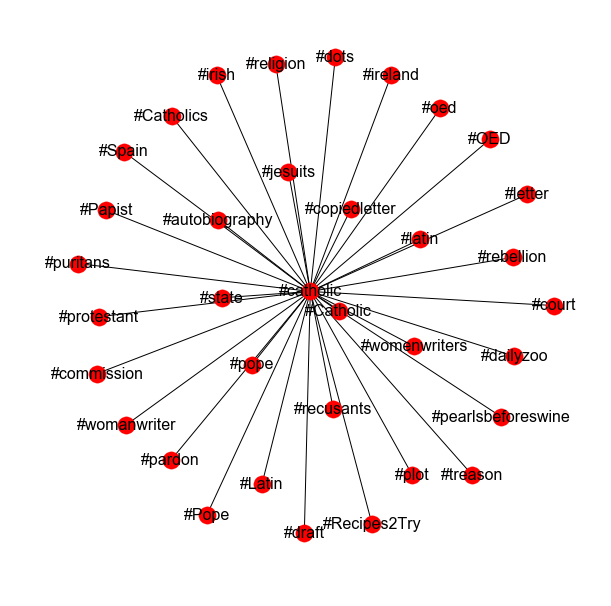

In [11]:
ta.Network.hashtaghashtagnetwork("#catholic", df)

### Hashtag/user network
This takes a hashtag and then plots a network based on which users that has written about it in the forum. The closer to the center concept, the more often the users write about it. 

In [ ]:
ta.Network.hashtagusernetwork("#womanwriter", df, plot=True, html=False)

### Regexp/user network
Similar to the hashtag/user network but using the power of Python flavoured regexps. Case insensivive. 

In [ ]:
ta.Network.regexpusernetwork("cathol|papist|pope", df)

### User/hashtag network
Tracks what hashtag a specific username writes. 

In [ ]:
ta.Network.userhashtagnetwork("VVH", df)

### User/user network
Takes a specific user and draws a network from the users spoken to, using the @username convention. 

This is an out-degree network. 

** Todo **: make in-degree network to see which users address a user (comparable to incoming @-tweets on Twitter). 

In [ ]:
ta.Network.userusernetwork("VVH", df)